In [1]:
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

2023-07-02 15:29:52.698272: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-02 15:29:52.907366: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-02 15:29:52.910504: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-02 15:29:54.873710: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
X_test = np.load('./private_test.npy')

channels = X_test.shape[0]
height = X_test.shape[1]
width = X_test.shape[2]

print(f"Loaded image with channels: {channels}, height: {height}, width: {width}")

Loaded image with channels: 10, height: 16384, width: 16384


In [3]:
cnn = load_model('../models/cnn')

In [4]:
def get_neighborhood(image, x, y):
    neighborhood = image[x:x+7, y:y+7,:]
    return neighborhood

In [5]:
X_batch = np.zeros((width, 7, 7, 10))

X_test = np.moveaxis(X_test, 0, -1)
X_test_padded = np.pad(X_test, ((3, 3), (3, 3), (0, 0)), mode='edge')
del X_test

for y in range(height):
    for x in range(width):
        X_new = get_neighborhood(X_test_padded, x, y)
        mean = np.mean(X_new)
        std = np.std(X_new)
        X_new = (X_new - mean) / std
        X_batch[x] = X_new
    pred = cnn.predict(X_batch).flatten()
    np.save(f'./CNN_Private_Test/private_test_cnn_{y}.npy', pred)

2023-07-02 15:36:47.485205: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 32112640 exceeds 10% of free system memory.


 71/512 [===>..........................] - ETA: 0s

2023-07-02 15:36:51.677637: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 32112640 exceeds 10% of free system memory.


 39/512 [=>............................] - ETA: 1s

2023-07-02 15:36:54.541457: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 32112640 exceeds 10% of free system memory.


 36/512 [=>............................] - ETA: 1s

2023-07-02 15:36:57.441306: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 32112640 exceeds 10% of free system memory.


 38/512 [=>............................] - ETA: 1s

2023-07-02 15:37:00.676560: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 32112640 exceeds 10% of free system memory.


512/512 [==============================] - 2s 3ms/step


KeyboardInterrupt: 

In [ ]:
predictions = predictions.reshape((1, width, height)).swapaxes(1, 2)
np.save('private_test_cnn.npy', predictions)

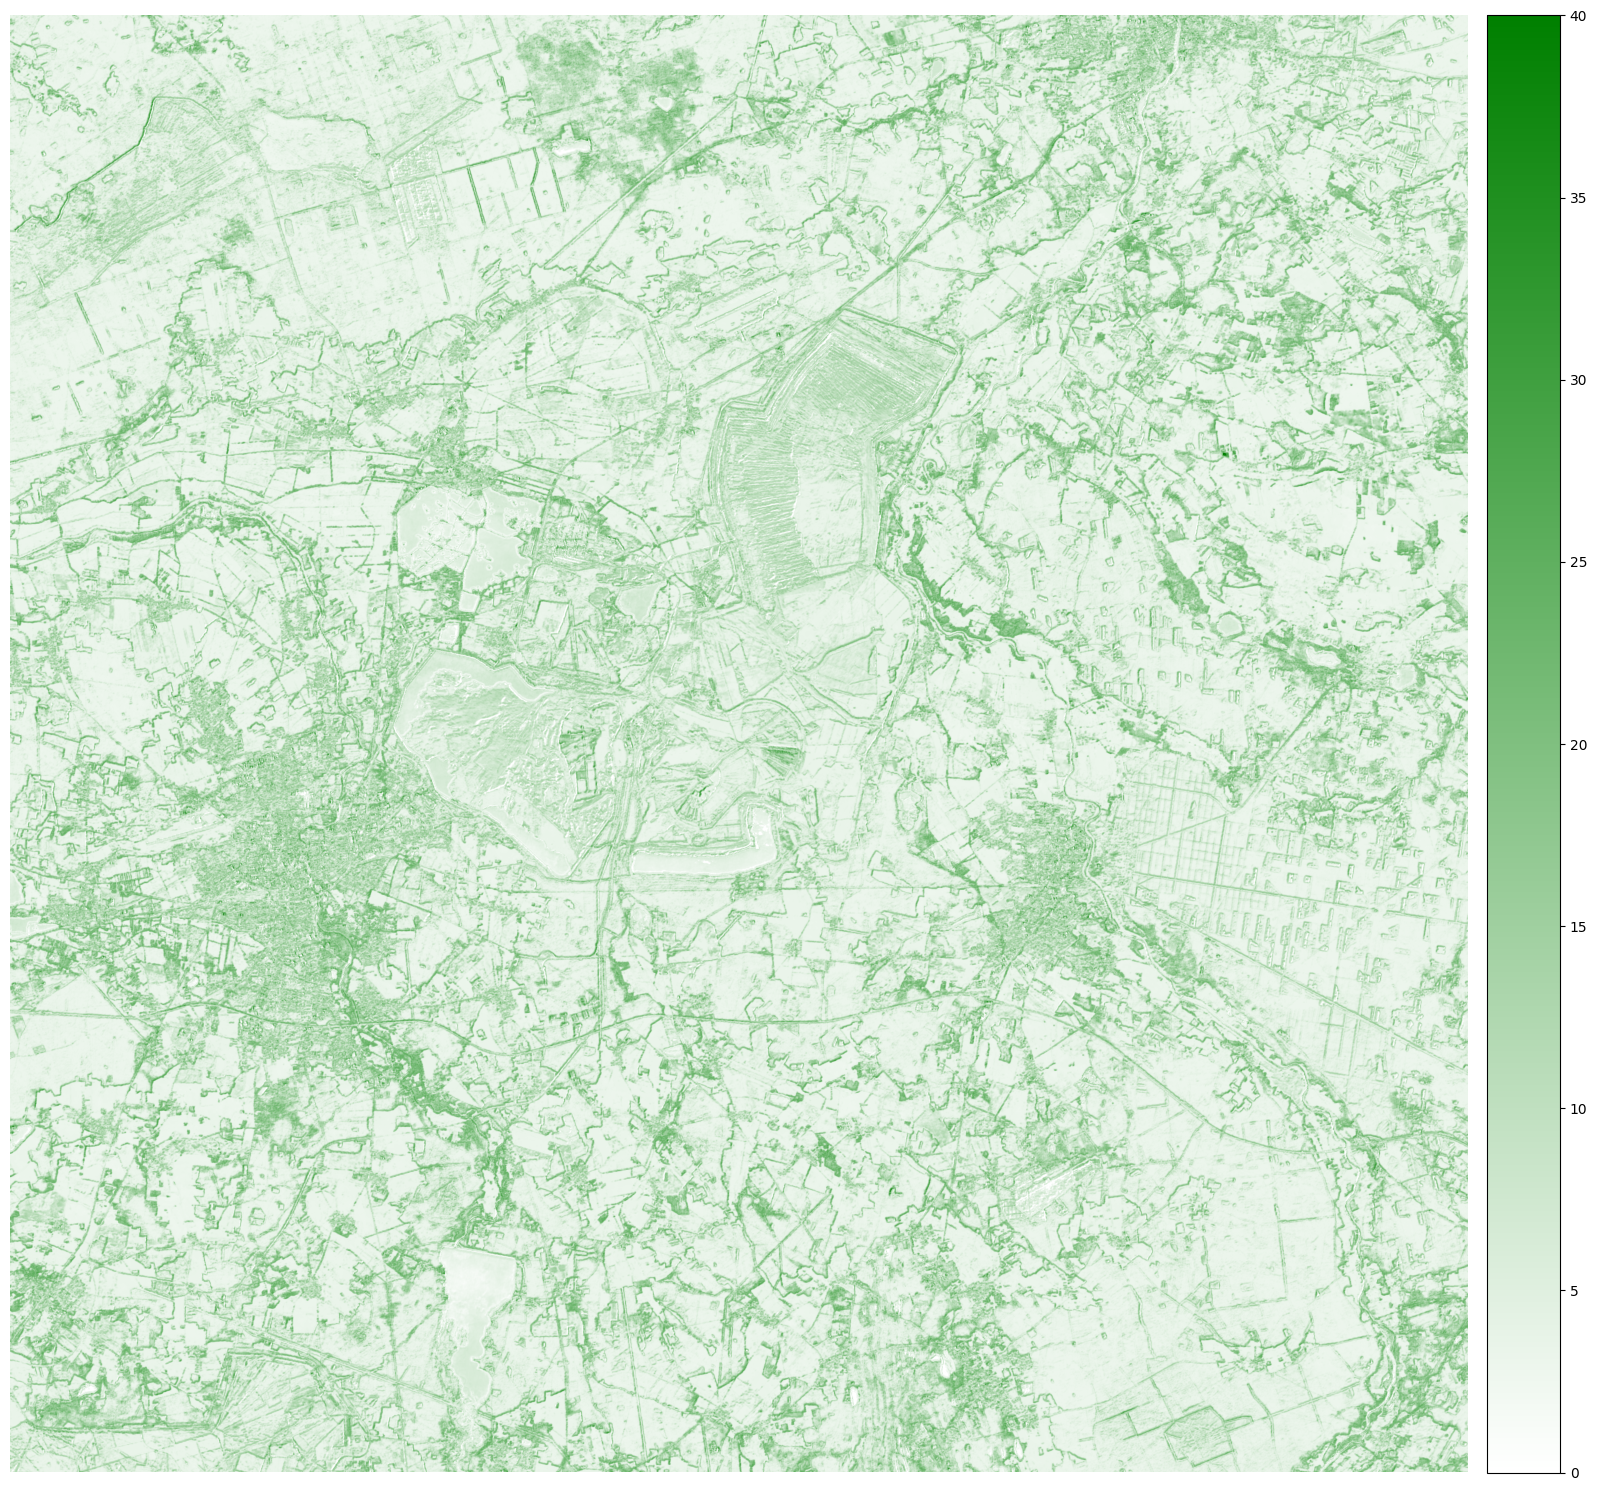

In [2]:
fig, ax = plt.subplots(figsize=(20, 20))
colors = ["white", "green"]
cmap = mcolors.LinearSegmentedColormap.from_list("mycmap", colors)
im = ax.imshow(np.load('private_test_cnn.npy')[0], cmap=cmap, vmin=0, vmax=40)

# Use make_axes_locatable to create axes for the colorbar that match the height of the image.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

plt.colorbar(im, cax=cax)

ax.axis('off')
plt.savefig('Private_Test_CNN.png', bbox_inches='tight')
plt.show()